In [ ]:
!pip install --upgrade transformers datasets evaluate huggingface_hub torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AIBD/Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
# Check NAN values
df.isna().sum()

,0
Unnamed: 0,0
Email Text,16
Email Type,0


In [ ]:
#Drop tha Na values
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [ ]:
#dataset shape
df.shape

(18634, 3)

In [ ]:
# Count the occurrences of each E-mail type.
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


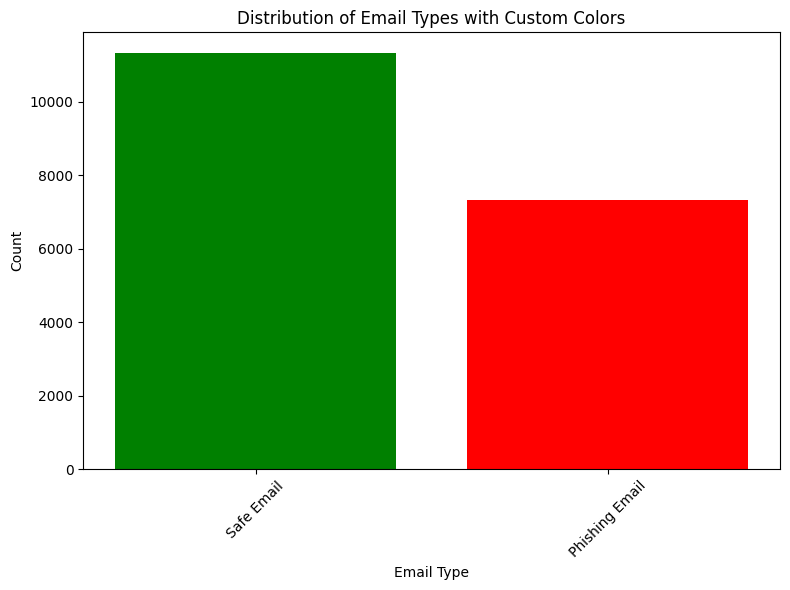

In [ ]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

In [ ]:
# We will use undersapling technique
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [ ]:
# lets check the shape again
Safe_Email.shape,Phishing_Email.shape

((7312, 3), (7312, 3))

In [ ]:
# let create a new Data with the balanced E-mail types
dataset= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
dataset.head()

,Unnamed: 0,Email Text,Email Type
0,5833,language planning and language pedagogy * * * ...,Safe Email
1,3647,Quoting Ciaran Johnston (cj@nologic.org):> Tha...,Safe Email
2,16335,"On Sun, Jul 21, 2002 at 11:12:34PM +0100, Paul...",Safe Email
3,9104,start date : 2 / 2 / 02 ; hourahead hour : 1 ;...,Safe Email
4,3953,ena sales on hpl i am working on a project for...,Safe Email


In [ ]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=0)
test_dataset, eval_dataset = train_test_split(test_dataset, test_size=0.5, random_state=0)

In [ ]:
train_dataset.to_csv('/content/drive/MyDrive/AIBD/train_dataset.csv', index=False)
test_dataset.to_csv('/content/drive/My Drive/AIBD/test_dataset.csv', index=False)
eval_dataset.to_csv('/content/drive/My Drive/AIBD/eval_dataset.csv', index=False)

In [ ]:
train_dataset = pd.read_csv("/content/drive/MyDrive/AIBD/train_dataset.csv")
test_dataset = pd.read_csv("/content/drive/MyDrive/AIBD/test_dataset.csv")
eval_dataset = pd.read_csv("/content/drive/MyDrive/AIBD/eval_dataset.csv")

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model_name = "1aurent/distilbert-base-multilingual-cased-finetuned-email-spam"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/321 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset

# Assuming 'dataset' is a pandas DataFrame
# Convert the pandas DataFrame to a Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_dataset)
test_dataset = Dataset.from_pandas(test_dataset)
eval_dataset = Dataset.from_pandas(eval_dataset)

# Update the label_mapping to include the correct keys: 'Safe Email' and 'Phishing Email'
label_mapping = {'Safe Email': 0, 'Phishing Email': 1}

# Update the map function to use the correct keys
train_dataset = train_dataset.map(lambda examples: {'labels': [label_mapping[label] for label in examples['Email Type']]}, batched=True)
test_dataset = test_dataset.map(lambda examples: {'labels': [label_mapping[label] for label in examples['Email Type']]}, batched=True)
eval_dataset = eval_dataset.map(lambda examples: {'labels': [label_mapping[label] for label in examples['Email Type']]}, batched=True)

tokenizer = AutoTokenizer.from_pretrained(model_name)
def tokenize_function(examples):
    return tokenizer(examples["Email Text"], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)
eval_dataset = eval_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/11699 [00:00<?, ? examples/s]

Map:   0%|          | 0/1462 [00:00<?, ? examples/s]

Map:   0%|          | 0/1463 [00:00<?, ? examples/s]

Map:   0%|          | 0/11699 [00:00<?, ? examples/s]

Map:   0%|          | 0/1462 [00:00<?, ? examples/s]

Map:   0%|          | 0/1463 [00:00<?, ? examples/s]

In [ ]:
from transformers import Trainer, TrainingArguments

# ตั้งค่าการฝึก
training_args = TrainingArguments(
    output_dir="./results",
    run_name="my_run_name",  # Change this to a specific name for your run
)

# Trainer สำหรับฝึกโมเดล
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # ชุดข้อมูลฝึก
    eval_dataset=eval_dataset  # ชุดข้อมูลประเมิน
)

trainer.train()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
500,0.259300
1000,0.150000
1500,0.120000
2000,0.044000
2500,0.064600
3000,0.040100
3500,0.028000
4000,0.025700


TrainOutput(global_step=4389, training_loss=0.08540940322754295, metrics={'train_runtime': 452.0869, 'train_samples_per_second': 77.633, 'train_steps_per_second': 9.708, 'total_flos': 4649208290629632.0, 'train_loss': 0.08540940322754295, 'epoch': 3.0})

In [ ]:
from huggingface_hub import login
login()
model.push_to_hub("Imboon/distilbert-phishing-email")

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Imboon/distilbert-phishing-email/commit/0eac3464a521cbfcab6ef0dddad63ac30b418cdb', commit_message='Upload DistilBertForSequenceClassification', commit_description='', oid='0eac3464a521cbfcab6ef0dddad63ac30b418cdb', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Imboon/distilbert-phishing-email', endpoint='https://huggingface.co', repo_type='model', repo_id='Imboon/distilbert-phishing-email'), pr_revision=None, pr_num=None)

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "1aurent/distilbert-base-multilingual-cased-finetuned-email-spam"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained("Imboon/distilbert-phishing-email")

config.json:   0%|          | 0.00/785 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

In [ ]:
#Create DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=256)

model.eval()

# เก็บค่าผลลัพธ์ที่คาดการณ์ได้ และค่าจริง (labels)
all_predictions = []
all_labels = []

# ปิด gradient (เพื่อให้ทำงานเร็วขึ้น)
with torch.no_grad():
    for batch in test_dataloader:
        inputs = tokenizer(batch['Email Text'], return_tensors='pt', padding=True, truncation=True)
        labels = batch['labels']

        # นำข้อมูลเข้าโมเดลและได้ logits
        outputs = model(**inputs)
        logits = outputs.logits

        # แปลง logits เป็นค่าความน่าจะเป็น
        probabilities = F.softmax(logits, dim=-1)

        # หาคลาสที่โมเดลทำนาย (ค่า 0 หรือ 1)
        predictions = torch.argmax(probabilities, dim=-1)

        # เก็บค่าผลลัพธ์
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels)


In [ ]:
label_mapping = { 0 : 'Safe Email', 1 : 'Phishing Email'}
all_predictions = [label_mapping[pred] for pred in all_predictions]
all_labels = [label_mapping[label.item()] for label in all_labels]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(all_predictions, all_labels))

                precision    recall  f1-score   support

Phishing Email       0.99      0.96      0.97       756
    Safe Email       0.96      0.99      0.97       706

      accuracy                           0.97      1462
     macro avg       0.97      0.97      0.97      1462
  weighted avg       0.97      0.97      0.97      1462



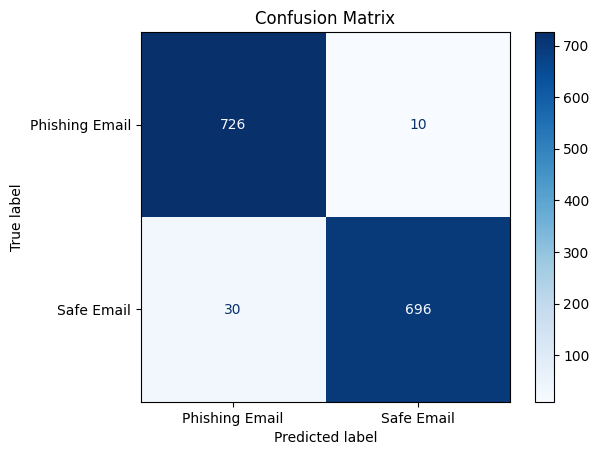

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# สร้าง confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# พล็อต confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Phishing Email", "Safe Email"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
